
# **Analisis Segmentasi Pelanggan Berdasarkan Pola Transaksi Penjualan Ritel.**

# **BUSINESS UNDERTANDING**

##Business Objective

Tujuan bisnis dari proyek ini adalah untuk meningkatkan efektivitas strategi pemasaran dan penjualan melalui pemahaman yang lebih mendalam terhadap perilaku pelanggan. Dengan menganalisis pola transaksi dalam data penjualan ritel, perusahaan dapat mengelompokkan pelanggan ke dalam segmen-segmen yang relevan. Segmentasi ini bertujuan agar perusahaan dapat menyusun kampanye promosi yang lebih tepat sasaran, meningkatkan retensi pelanggan, serta mengoptimalkan penawaran produk yang sesuai dengan kebutuhan masing-masing segmen pelanggan.

##Assess Situation

Situasi saat ini menunjukkan bahwa perusahaan memiliki data transaksi penjualan yang cukup lengkap namun belum dimanfaatkan secara maksimal untuk mendukung pengambilan keputusan strategis. Data yang tersedia mencakup informasi penting seperti ID pelanggan, produk yang dibeli, tanggal transaksi, dan jumlah pembelian. Namun, belum ada upaya sistematis untuk mengevaluasi data tersebut guna memahami karakteristik pelanggan. Selain itu, belum diterapkan pendekatan segmentasi yang berbasis data untuk mendukung strategi penjualan yang lebih personal dan efisien.

##Data Mining Goals

Tujuan dari data mining dalam proyek ini adalah untuk mengidentifikasi pola-pola transaksi pelanggan yang signifikan dan membentuk segmen pelanggan berdasarkan perilaku pembelian mereka. Hasil segmentasi ini nantinya diharapkan dapat memberikan insight mengenai karakteristik tiap segmen, seperti pelanggan setia, pelanggan musiman, atau pelanggan dengan nilai pembelian tinggi. Informasi ini dapat digunakan untuk menyusun strategi pemasaran yang lebih terfokus.

##Project Plan

Rencana proyek dimulai dengan tahap awal eksplorasi dan pembersihan data transaksi yang tersedia. Selanjutnya, dilakukan analisis eksploratif untuk memahami distribusi dan karakteristik data. Setelah itu, akan diterapkan teknik segmentasi pelanggan menggunakan algoritma clustering. Tahap evaluasi akan dilakukan untuk menentukan kualitas segmentasi. Setelah model optimal ditemukan, hasil segmentasi akan divisualisasikan dan diinterpretasikan untuk mendukung pengambilan keputusan bisnis.

# **DATA UNDERSTANDING**

##Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

## Collect Initial Data

In [ ]:
df = pd.read_csv('retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2024-03-11,CUST185,Female,39,Sports,5,200,1000
1,2,2024-08-06,CUST095,Female,37,Beauty,1,20,20
2,3,2024-07-26,CUST077,Female,42,Sports,2,100,200
3,4,2024-02-07,CUST115,Male,40,Clothing,5,200,1000
4,5,2024-01-02,CUST508,Male,46,Electronics,2,30,60
...,...,...,...,...,...,...,...,...,...
1995,1996,2024-09-14,CUST100,Male,47,Electronics,3,500,1500
1996,1997,2024-06-18,CUST205,Female,32,Sports,1,100,100
1997,1998,2024-01-01,CUST003,Female,18,Electronics,3,100,300
1998,1999,2024-12-20,CUST648,Female,53,Clothing,1,200,200


##Describe Data

###Informasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    2000 non-null   int64 
 1   Date              2000 non-null   object
 2   Customer ID       2000 non-null   object
 3   Gender            2000 non-null   object
 4   Age               2000 non-null   int64 
 5   Product Category  2000 non-null   object
 6   Quantity          2000 non-null   int64 
 7   Price per Unit    2000 non-null   int64 
 8   Total Amount      2000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 140.8+ KB


Berdasarkan data diatas dapat diketahui bahwa dataset tersebut memiliki 9 kolom dan 1000 baris.

1. Transaction ID (int64)
```
ID unik untuk setiap transaksi.
Tipe data: Integer.
jumlah Baris: 2000
Berfungsi sebagai pengenal satu-satu untuk tiap baris transaksi.
```

2. Date (object)
```
Tanggal saat transaksi dilakukan.
Tipe data: object (string)
jumlah Baris: 2000
```

3. Customer ID (object)
```
ID unik untuk setiap pelanggan.
Tipe data: object
jumlah Baris: 2000
```

4. Gender (object)
```
Jenis kelamin pelanggan (contohnya: "Male", "Female").
Tipe data: String/kategori.
jumlah Baris: 2000
```

5. Age (int64)
```
Usia pelanggan dalam tahun.
Tipe data: Integer.
jumlah Baris: 2000
```

6. Product Category (object)
```
Kategori produk yang dibeli
Tipe data: String/kategori.
jumlah Baris: 2000
```

7. Quantity (int64)
```
Jumlah unit produk yang dibeli dalam transaksi.
Tipe data: Integer.
jumlah Baris: 2000
```

8. Price per Unit (int64)
```
Harga satuan produk yang dibeli.
Tipe data: Integer (dalam satuan mata uang, misal rupiah/dolar).
jumlah Baris: 2000
```

9. Total Amount (int64)
```
Jumlah total transaksi, biasanya merupakan hasil dari Quantity × Price per Unit.
Tipe data: Integer.
jumlah Baris: 2000
```

###Describe Data

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,40.547000,3.04400,118.135000,364.535000
std,577.494589,13.377902,1.40963,146.609068,520.591002
min,1.000000,18.000000,1.00000,10.000000,10.000000
25%,500.750000,29.000000,2.00000,30.000000,60.000000
50%,1000.500000,40.000000,3.00000,50.000000,150.000000
75%,1500.250000,52.000000,4.00000,100.000000,400.000000
max,2000.000000,64.000000,5.00000,500.000000,2500.000000


1. Transaction ID:
```
Dataset ini mencatat sebanyak 2000 transaksi, yang ditunjukkan oleh nilai maksimum pada kolom Transaction ID.
Artinya, terdapat total 2000 baris data transaksi yang siap dianalisis.

2. Age:
```
Usia pelanggan dalam dataset ini berkisar antara 18 hingga 64 tahun. Pelanggan termuda berusia 18 tahun,
sedangkan yang tertua berusia 64 tahun. Rata-rata usia pelanggan adalah 40,54 tahun, dengan standar deviasi sebesar 13,377
yang menunjukkan adanya penyebaran usia yang cukup bervariasi.
```

3. Quantity:
```
Rata-rata jumlah produk yang dibeli dalam satu transaksi adalah sekitar 3,04 unit.
Jumlah minimum produk yang dibeli adalah 1 unit, dan maksimum adalah 5 unit. Standar deviasi sebesar 1,4
menunjukkan adanya perbedaan jumlah produk yang cukup moderat antar transaksi.
```

4. Price per Unit:
```
Harga satuan produk dalam dataset ini bervariasi dari 10 hingga 500 dollar.
Rata-rata harga per unit berada di angka 118,135 dolar, dengan standar deviasi yang tinggi sebesar 146,60
mengindikasikan adanya perbedaan harga yang cukup besar antar produk.
```

5. Total Amount:
```
Nilai total transaksi per pembelian berkisar antara 10 hingga 2500 dollar. Rata-rata total pembayaran adalah 364 dollar,
dengan standar deviasi sebesar 520,591 yang mencerminkan fluktuasi nilai transaksi yang cukup besar dalam dataset.
```

##Exploratory Data Analysis

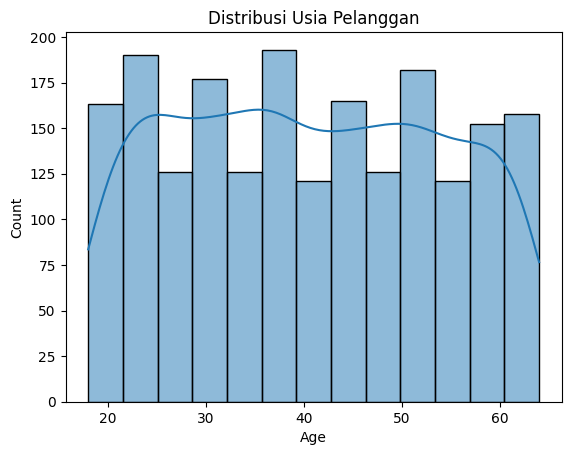

In [ ]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Usia Pelanggan')
plt.show()

Berdasarkan visualisasi di atas, distribusi usia pelanggan menunjukkan pola yang cukup menyebar, dengan konsentrasi terbesar pada usia 20-an hingga awal 50-an. Puncak distribusi terlihat di sekitar usia 40-an, yang juga menjadi nilai median. Artinya, banyak pelanggan yang berada dalam usia produktif dan mapan secara finansial.

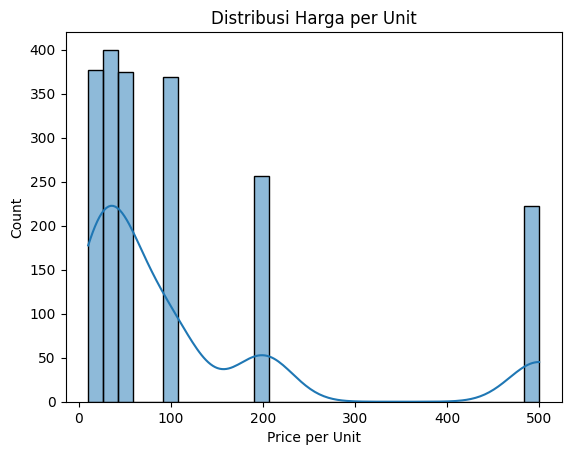

In [ ]:
sns.histplot(df['Price per Unit'], bins=30, kde=True)
plt.title('Distribusi Harga per Unit')
plt.show()

Berdasarkan visualisasi distribusi harga per unit, dapat disimpulkan bahwa mayoritas produk dijual dengan harga yang relatif rendah. Hal ini ditunjukkan oleh puncak distribusi yang berada pada kisaran harga rendah dan kemiringan grafik ke arah kanan, yang mengindikasikan hanya sebagian kecil produk yang memiliki harga tinggi.

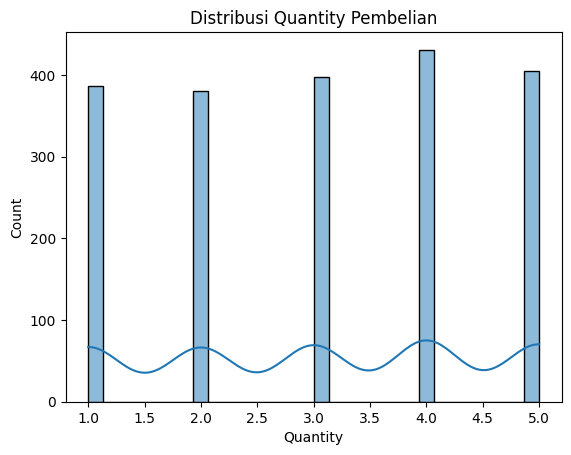

In [ ]:
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribusi Quantity Pembelian')
plt.show()

Berdasarkan visualisasi distribusi quantity pembelian, terlihat bahwa sebagian besar transaksi melibatkan pembelian dalam jumlah kecil. Hal ini tercermin dari puncak distribusi yang berada pada kisaran quantity rendah, serta kemiringan grafik yang menunjukkan bahwa jumlah pembelian dalam jumlah besar relatif jarang terjadi.

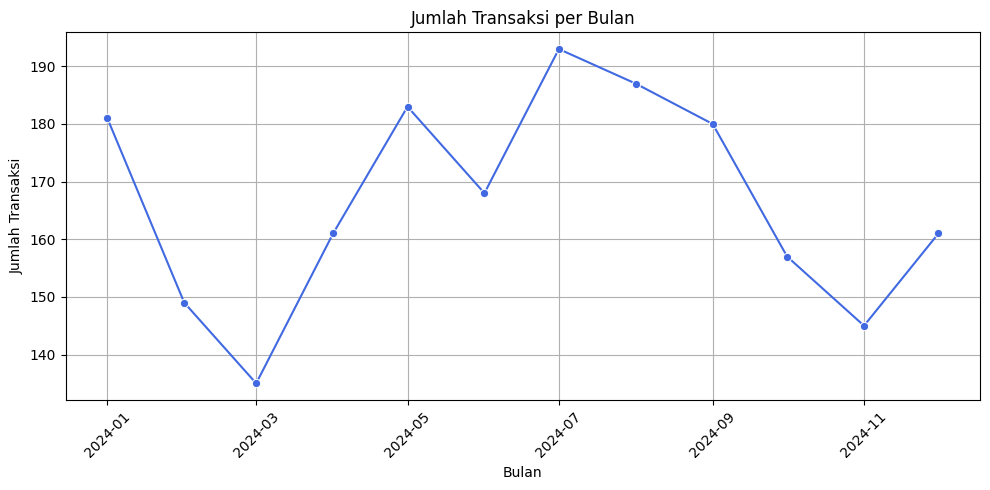

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_txn_count = df.groupby('Month').size().reset_index(name='Transaction Count')
monthly_txn_count['Month'] = monthly_txn_count['Month'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_txn_count, x='Month', y='Transaction Count', marker='o', color='royalblue')
plt.title('Jumlah Transaksi per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, jumlah transaksi per bulan mengalami fluktuasi dengan puncak aktivitas terjadi pada bulan-bulan tertentu seperti Mei dan Oktober. Pola ini menunjukkan adanya pengaruh musiman atau kampanye promosi terhadap perilaku belanja pelanggan.

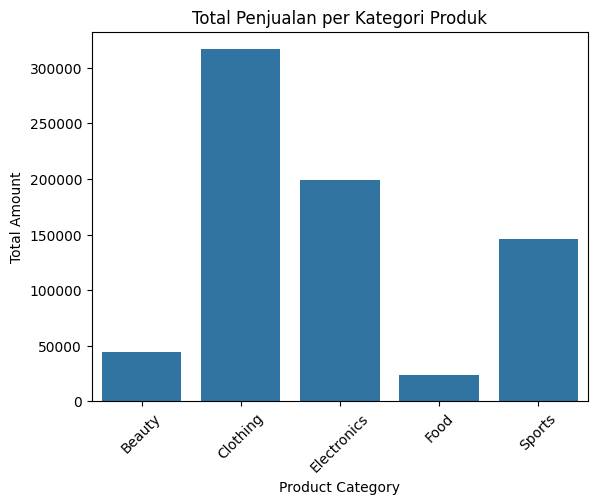

In [ ]:
df['Total Amount'] = df['Quantity'] * df['Price per Unit']
sns.barplot(data=df.groupby('Product Category')['Total Amount'].sum().reset_index(),
            x='Product Category', y='Total Amount')
plt.title('Total Penjualan per Kategori Produk')
plt.xticks(rotation=45)
plt.show()

Berdasarkan visualisasi di atas, total penjualan per kategori produk menunjukkan bahwa beberapa kategori menyumbang pendapatan yang jauh lebih besar dibandingkan yang lain. Kategori dengan total penjualan tertinggi kemungkinan merupakan produk-produk unggulan atau paling diminati pelanggan. Sebaliknya, kategori dengan penjualan rendah bisa menjadi indikasi kurangnya minat pasar atau efektivitas promosi yang rendah.

<Axes: >

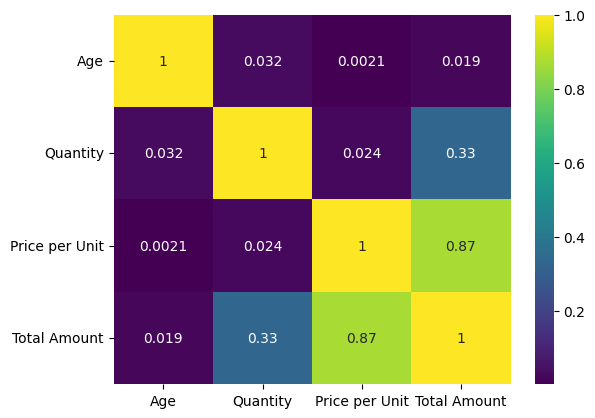

In [ ]:
sns.heatmap(data = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(),
            annot = True,
            cmap= 'viridis')

Berdasarkan visualisasi di atas, heatmap korelasi menunjukkan hubungan antar variabel numerik dalam data. Terlihat bahwa terdapat korelasi yang cukup kuat antara Quantity dan Total Amount, yang masuk akal karena jumlah pembelian langsung memengaruhi total nilai transaksi. Sementara itu, Price per Unit juga memiliki korelasi positif sedang terhadap Total Amount. Variabel Age menunjukkan korelasi yang lemah terhadap variabel lainnya, menandakan bahwa usia pelanggan tidak terlalu berpengaruh langsung terhadap jumlah atau nilai pembelian.

Text(0.5, 1.0, 'Gender')

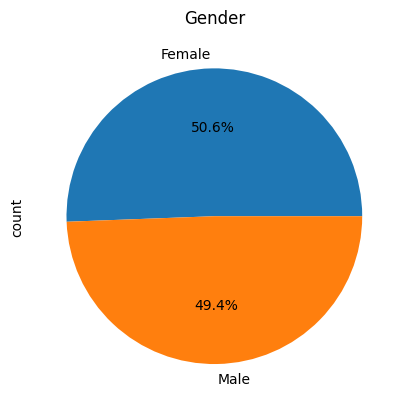

In [ ]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('Gender')

Berdasarkan visualisasi di atas, distribusi gender pelanggan menunjukkan proporsi antara laki-laki dan perempuan dalam data. Persentase yang ditampilkan memberikan gambaran apakah ada dominasi kelompok gender tertentu dalam basis pelanggan.

##Verify Data Quality

###Missing Values

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Transaction ID,0.0
Date,0.0
Customer ID,0.0
Gender,0.0
Age,0.0
Product Category,0.0
Quantity,0.0
Price per Unit,0.0
Total Amount,0.0
Month,0.0


Berdasarkan pengecekkan di atas yang menunjukkan persentase missing value dalam dataset, dapat disimpulkan bahwa tidak ada nilai yang hilang pada semua kolom. Hal ini menunjukkan bahwa dataset bersih dari missing value dan dapat dilanjutkan ke proses selanjutnya

###Duplicated Values

In [ ]:
df[df.duplicated()]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month


Berdasarkan hasil pengecekan duplikasi menggunakan code diatas, dapat disimpulkan bahwa tidak terdapat data yang duplikat dalam dataset.

###Outliers Values

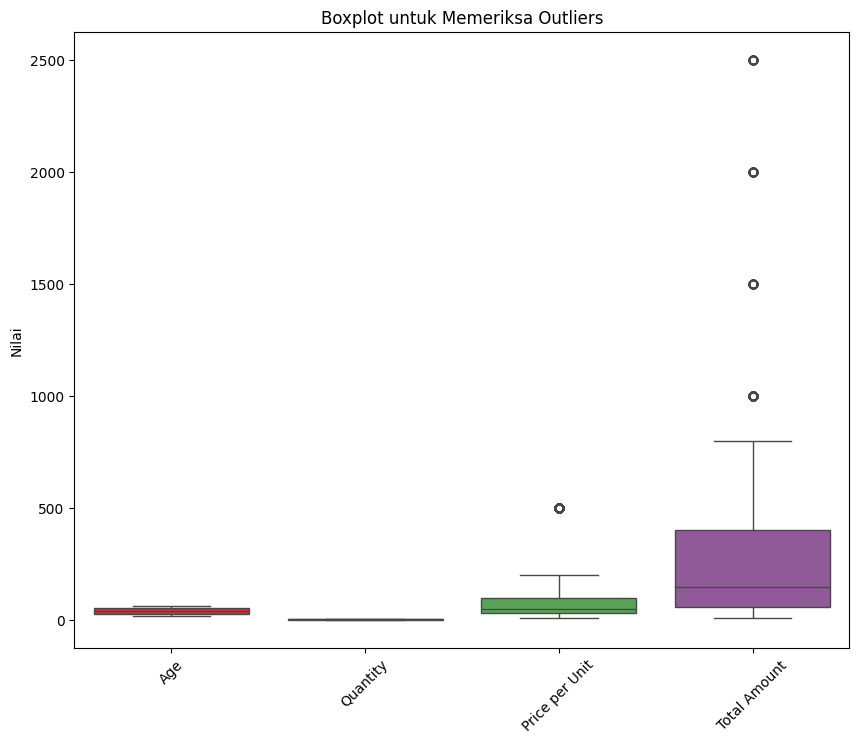

In [ ]:
numeric_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numeric_columns], palette='Set1', showfliers=True)
plt.title('Boxplot untuk Memeriksa Outliers')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.show()

Berdasarkan hasil pengecekan  outliers menggunakan code diatas, dapat disimpulkan bahwa ada beberapa outliers di price per unit dan Total Amount.

# **DATA PREPARATION**

##Data Cleaning

###Penanganan Missing Values

In [ ]:
print((df.isna().sum() / len(df)) * 100)

Transaction ID      0.0
Date                0.0
Customer ID         0.0
Gender              0.0
Age                 0.0
Product Category    0.0
Quantity            0.0
Price per Unit      0.0
Total Amount        0.0
Month               0.0
dtype: float64


Untuk melakukan penanganan missing values perlu dilakukan pengecekkan nilai kosong pada dataset, dan hasil menunjukkan bahwa tidak ada nilai kosong pada semua kolom, maka dari itu kita dapat melanjutkan ke penanganan berikutnya.

###Penanganan Duplicated Values

In [ ]:
df[df.duplicated()]

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month


Untuk melakukan penanganan duplicated values juga perlu melakukan pengecekkan dengan kode seperti diatas, dan hasil menunjukkan bahwa tidak ada data duplikat pada dataset.

###Penanganan Outliers Values

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Transaction ID,0.00
Age,0.00
Quantity,0.00
Price per Unit,11.10
Total Amount,11.95


Untuk melalukan penanganan outliers values kita perlu melakukan pengecekkan dengan kode seperti diatas, dan hasil menunjukkan bahwa ada outliers oada dataset di kolom Price per Unit dan Total Amount. Akan tetapi karena outliers pada kedua kolom tersebut normal dan mencerminkan transaksi yang valid maka tidak dilakukan penanganan.

##Construct Data

###Recency

In [ ]:
snapshot_date = df['Date'].max() + dt.timedelta(days=1)
recency_df = df.groupby('Customer ID')['Date'].max().reset_index()
recency_df['Recency'] = (snapshot_date - recency_df['Date']).dt.days
df = df.merge(recency_df[['Customer ID', 'Recency']], on='Customer ID', how='left')

Penambahan kolom Recency dilakukan untuk mengukur seberapa baru seorang pelanggan melakukan transaksi terakhirnya. Kolom ini sangat penting untuk mengidentifikasi pelanggan yang baru aktif maupun pelanggan yang sudah lama tidak berbelanja lagi, sehingga dapat membantu strategi retensi pelanggan.

###Frequency

In [ ]:
# Membuat frequency_df
frequency_df = df.groupby('Customer ID').agg({'Date': 'nunique'}).reset_index()
frequency_df.rename(columns={'Date': 'Frequency'}, inplace=True)

# Gabungkan ke df utama
df = df.merge(frequency_df, on='Customer ID', how='left')

Penambahan kolom Frequency dilakukan untuk mengetahui seberapa sering seorang pelanggan melakukan transaksi dalam dataset. Informasi ini berguna untuk mengidentifikasi pelanggan dengan frekuensi pembelian tinggi, yang biasanya menunjukkan loyalitas yang kuat terhadap produk atau layanan, serta menjadi dasar penting untuk melakukan segmentasi pelanggan berdasarkan aktivitas mereka.

### Monetary

In [ ]:
# Membuat monetary_df
monetary_df = df.groupby('Customer ID').agg({'Total Amount': 'sum'}).reset_index()
monetary_df.rename(columns={'Total Amount': 'Monetary'}, inplace=True)

# Gabungkan ke df utama
df = df.merge(monetary_df, on='Customer ID', how='left')


Penambahan kolom Monetary bertujuan untuk menghitung total uang yang dibelanjakan oleh setiap pelanggan selama periode transaksi. Kolom ini sangat berguna untuk menilai kontribusi finansial masing-masing pelanggan terhadap pendapatan bisnis, sehingga perusahaan bisa memprioritaskan pelanggan bernilai tinggi untuk program loyalitas atau penawaran khusus.

In [ ]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Recency,Frequency,Monetary
0,1,2024-03-11,CUST185,Female,39,Sports,5,200,1000,2024-03,234,2,1010
1,2,2024-08-06,CUST095,Female,37,Beauty,1,20,20,2024-08,76,5,1540
2,3,2024-07-26,CUST077,Female,42,Sports,2,100,200,2024-07,23,4,1950
3,4,2024-02-07,CUST115,Male,40,Clothing,5,200,1000,2024-02,233,3,1230
4,5,2024-01-02,CUST508,Male,46,Electronics,2,30,60,2024-01,284,2,560


In [ ]:
df.to_csv('datauntuktableau.csv', index=False)

##Data Reduction

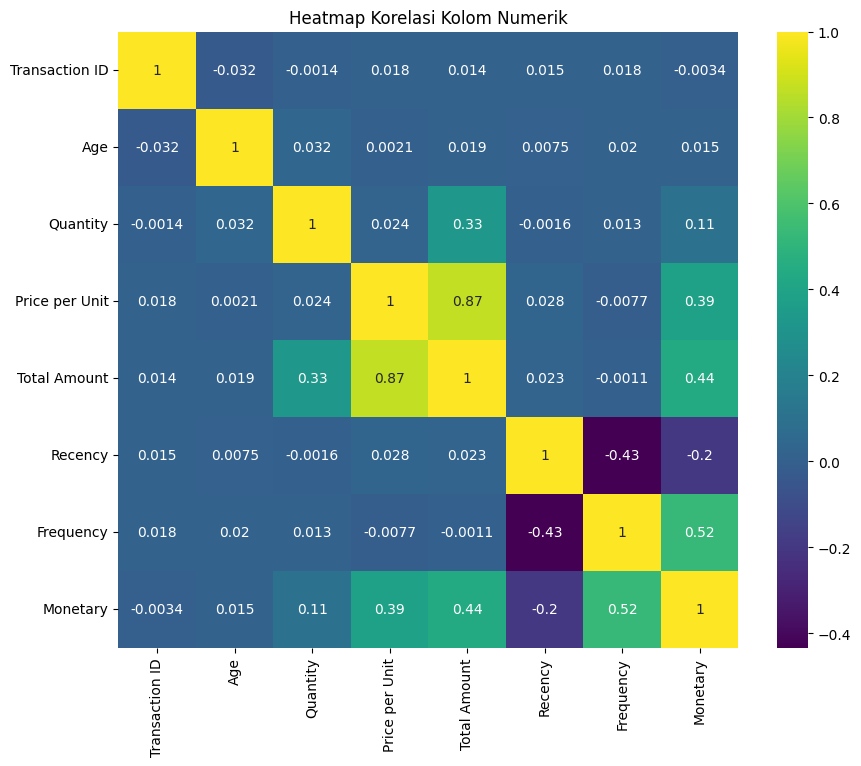

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(data=numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Heatmap Korelasi Kolom Numerik')
plt.show()

Disini kita mengecek kolom apa aja yang kurang relevan untuk analisa kita.

In [ ]:
df = df.drop(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
               'Product Category', 'Quantity', 'Price per Unit',
               'Total Amount', 'Month'], axis=1)

Disini kita menghapus kolom kolom yang tidak relevan dengan analisis kita.

In [ ]:
df.head()

,Recency,Frequency,Monetary
0,234,2,1010
1,76,5,1540
2,23,4,1950
3,233,3,1230
4,284,2,560


## **Menyimpan Data**

In [ ]:
df.to_csv('data_Cleaned.csv', index=False)

In [ ]:
df.head(5)

,Recency,Frequency,Monetary
0,234,2,1010
1,76,5,1540
2,23,4,1950
3,233,3,1230
4,284,2,560


# **Modelling**

## **Select Modelling Techniques**

Saya memilih menggunakan kombinasi algoritma asosiasi karena fokus utama analisis ini adalah melakukan segmentasi pelanggan. Dengan model asosiasi, saya dapat menemukan pola pembelian yang sering terjadi bersamaan di antara pelanggan, sehingga memungkinkan saya mengelompokkan mereka ke dalam segmen yang lebih homogen berdasarkan preferensi belanja.

Algoritma asosiasi yang saya gunakan terdiri dari dua jenis, yaitu K-Means dan Hierarchical Clustering.

K-Means: Saya memilih K-Means karena algoritma ini efisien dalam membagi pelanggan ke dalam kelompok berdasarkan kesamaan pola pembelian. Selain itu, dengan K-Means, saya dapat menentukan jumlah cluster di awal, sehingga dapat membantu memahami jumlah segmen dalam data pelanggan.

Hierarchical Clustering: Saya juga menggunakan Hierarchical Clustering karena algoritma ini mampu memberikan gambaran menyeluruh mengenai struktur data dan hubungan antar kelompok pelanggan. Dalam konteks segmentasi, metode ini membantu mengidentifikasi struktur hierarki dalam preferensi pembelian, sehingga saya dapat melihat bagaimana kelompok besar pelanggan dapat dibagi lagi menjadi subkelompok berdasarkan spesifikasi produk atau tingkat pengeluaran.

##**Inisiasi Variabel untuk menyimpan Dataframe**

In [ ]:
df = pd.read_csv("data_Cleaned.csv")

In [ ]:
df.head(5)

,Recency,Frequency,Monetary
0,234,2,1010
1,76,5,1540
2,23,4,1950
3,233,3,1230
4,284,2,560


## **Modelling Associate**

### **Pre Processing**

In [ ]:
x_final = df

Melakukan pemilihan fitur data apa saja yang dipakai untuk klustering lalu disimpan pada variabel x_final, disini saya memakai semua kolom.

### **Normalisasi Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_final_norm = scaler.fit_transform(x_final)

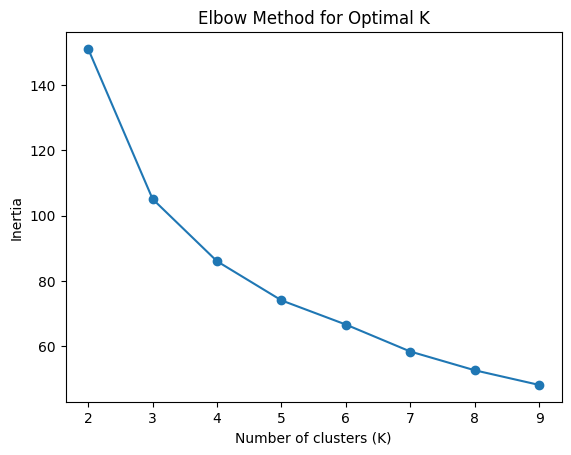

In [ ]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Visualisasi ini merupakan hasil dari metode "Elbow" yang digunakan untuk menentukan jumlah klaster optimal pada algoritma KMeans. Dengan melihat grafik, saya mencari titik di mana kurva membentuk sudut yang tajam (seperti siku), yang menunjukkan perubahan signifikan. Titik tersebut menandai jumlah klaster terbaik, yaitu saat penambahan klaster berikutnya tidak lagi memberikan penurunan inertia yang berarti. Dalam kasus ini, titik "Elbow" terlihat pada jumlah 3 klaster.

### **Build Model**

K-Means

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(x_final_norm)

kode diatas berfungsi untuk membuat  model K-Means pada data x_final_norm ke dalam 4 cluster.

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(x_final_norm)

kode diatas berfungsi untuk membuat model Hierarchical Agglomerative Clustering pada data x_final_norm ke dalam 4 cluster.

### **Begins and Compare Clusters**

In [ ]:
kmeans_col = pd.DataFrame(labels, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(agglo_labels, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

Kode diatas berfungsi untuk mengelompokkan data menjadi klaster menggunakan model KMeans dan Hierarchical Clustering. Setelah melakukan prediksi klaster, data asli digabungkan dengan label cluster yang telah diprediksi untuk analisis lebih lanjut.

In [ ]:
combined_data_assoc.head()

,Recency,Frequency,Monetary,kmeans_cluster,hierarchy_cluster
0,234,2,1010,1,0
1,76,5,1540,0,1
2,23,4,1950,0,2
3,233,3,1230,1,0
4,284,2,560,1,0


In [ ]:
combined_data_assoc.to_csv('hasil_clustering.csv', index=False)

Kode diatas berfungsi untuk mengelompokkan data menjadi klaster menggunakan model KMeans dan Hierarchical Clustering. Setelah melakukan prediksi klaster, data asli digabungkan dengan label cluster yang telah diprediksi untuk analisis lebih lanjut.

# **EVALUATION**

## Evaluate Results

In [ ]:
# Calculate the scores
silhouette_avg_kmeans = silhouette_score(x_final_norm, labels)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, labels)
db_score_kmeans = davies_bouldin_score(x_final_norm, labels)

silhouette_avg_hc = silhouette_score(x_final_norm, agglo_labels)
ch_score_hc = calinski_harabasz_score(x_final_norm, agglo_labels)
db_score_hc = davies_bouldin_score(x_final_norm, agglo_labels)

# Create a DataFrame to display the scores
metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')
df_scores = df_scores.T

# Display the scores with formatting
df_scores.style.format("{:.7f}").highlight_max(color='green', axis=0)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.3338166,1274.6546118,1.0518829
Agglomerative Clustering Score,0.2609090,973.4341892,1.0978852


Evaluasi model clustering dilakukan menggunakan Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score. Secara umum, KMeans menunjukkan hasil yang lebih baik dibandingkan Agglomerative Clustering.

Untuk KMeans, Silhouette Score sebesar 0.3338 dan Calinski-Harabasz Score sebesar 1274.65 menunjukkan cluster yang cukup baik, dengan Davies-Bouldin Score 1.0519 yang relatif rendah.
Sementara itu, Agglomerative Clustering memiliki Silhouette Score 0.2609 dan Calinski-Harabasz Score 973.43, dengan Davies-Bouldin Score 1.0979, yang menunjukkan kualitas clustering lebih rendah dibandingkan KMeans.

## Review Process

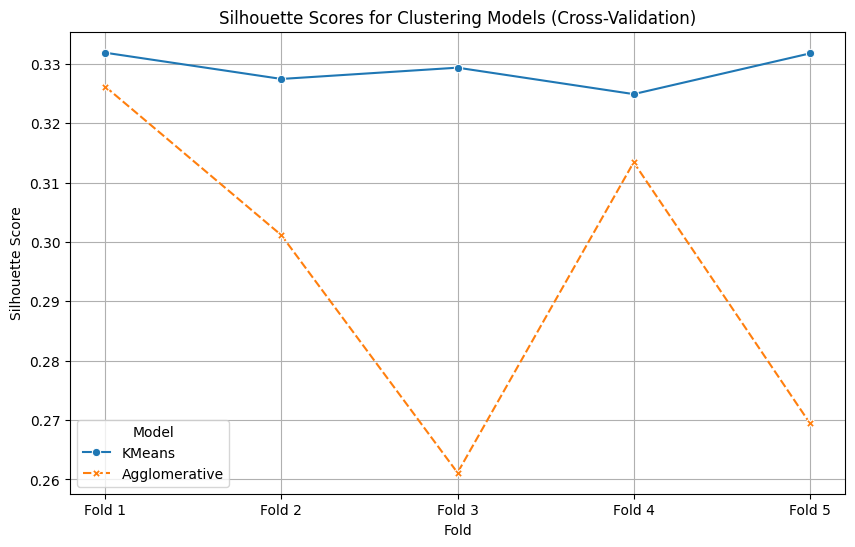

In [ ]:
from sklearn.model_selection import KFold
clustering_models = [kmeans, agglo]
clustering_names = ['KMeans', 'Agglomerative']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
silhouette_scores = []

for model in clustering_models:
    fold_scores = []
    for train_idx, _ in kf.split(x_final_norm):
        X_fold = x_final_norm[train_idx]
        model.fit(X_fold)
        try:
            labels = model.predict(X_fold)
        except:
            labels = model.labels_
        if len(set(labels)) > 1:
            sil = silhouette_score(X_fold, labels)
            fold_scores.append(sil)
        else:
            fold_scores.append(np.nan)
    silhouette_scores.append(fold_scores)

df_silhouette = pd.DataFrame(silhouette_scores, index=clustering_names).T

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_silhouette, markers=True)
plt.title('Silhouette Scores for Clustering Models (Cross-Validation)')
plt.xlabel('Fold')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend(title='Model', loc='best')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Visualisasi di atas secara komprehensif menunjukkan bahwa model kmeans merupakan model klustering terbaik karena memiliki nilai silhouette yang paling konsisten dengan rata-rata sekitar 0.33. Model ini dipastikan dapat memisahkan kluster-kluster berdasarkan karakteristiknya dengan cukup baik dan jelas.

### Tuning Hyperparameter

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definisi parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'algorithm': ['lloyd', 'elkan']
}

best_score = -1
best_params = None
best_model = None

# Loop semua kombinasi parameter
for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for n_init in param_grid['n_init']:
            for algorithm in param_grid['algorithm']:
                kmeans = KMeans(
                    n_clusters=n_clusters,
                    init=init,
                    n_init=n_init,
                    algorithm=algorithm,
                    random_state=42
                )
                labels = kmeans.fit_predict(x_final_norm)  # x_final = data clustering kamu
                score = silhouette_score(x_final, labels)

                if score > best_score:
                    best_score = score
                    best_params = {
                        'n_clusters': n_clusters,
                        'init': init,
                        'n_init': n_init,
                        'algorithm': algorithm
                    }
                    best_model = kmeans

# Hasil tuning
print("Parameter terbaik:", best_params)
print("Silhouette Score terbaik:", best_score)


Parameter terbaik: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 30, 'algorithm': 'lloyd'}
Silhouette Score terbaik: 0.10975770637128218


Berdasarkan tuning di atas, hasil menunjukkan penurunan Silhouette Score, sehingga kita dapat menyimpulkan bahwa tuning parameter KMeans tidak berhasil meningkatkan pemisahan antar cluster. Sebaliknya, model clustering tanpa tuning justru memberikan hasil yang lebih baik dalam hal kualitas cluster, seperti yang terlihat dari Silhouette Score yang lebih tinggi.

## **Determine Next Steps**

Dari pemodelan dan evaluasi yang telah dilakukan, disimpulkan bahwa model yang digunakan memberikan hasil yang baik dan dapat diterapkan untuk tujuan yang telah ditentukan, seperti segmentasi pelanggan. Meskipun ada variasi dalam performa, model-model yang ada menunjukkan akurasi yang cukup memadai.

Selanjutnya, tahapan ini akan dilanjutkan ke deployment, yaitu proses penerapan model ke dalam penggunaan nyata. Pada tahap ini, model akan mulai digunakan untuk membantu pengambilan keputusan, serta dipastikan tetap berjalan dengan baik dan relevan seiring waktu.

In [ ]:
import pickle

# Save scaler ke file
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save AgglomerativeClustering model ke file
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

#Final Report

FastAPI : https://drive.google.com/drive/folders/1RFrKfa90ih2ZxUZO3YbCVBKf_Udp7A34?usp=sharing

Dashboard : https://drive.google.com/drive/folders/1onu7dXD2fR2lLkSDYJvPCML8B_lEBXTE?usp=sharing

#Review Project

Slide Deck : https://www.canva.com/design/DAGl6ypfllU/NedTCLMmv386ZJl5a_BCMA/edit